In [497]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
plt.style.use('ggplot')

In [466]:
# uploading dataset
df=pd.read_csv('/kaggle/input/dataset/Placement_Data_Full_Class.csv')

In [467]:
#lets see the data
df.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [468]:
# Now let's see how many unique values do status column have? 
df['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [469]:
# As we have seen above we have only Placed and Not Placed, so, its convinient to replace "Placed" by 1 and "Not Placed" by 0.
df['status'] = df['status'].map({'Placed': 1, 'Not Placed': 0})

In [470]:
# unique values in specialisation
df['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [471]:
# replace "Mkt&HR" by 1 and "Mkt&Fin" by 0.
df['specialisation'] = df['specialisation'].map({'Mkt&HR': 1, 'Mkt&Fin': 0})

In [472]:
df['workex'].unique()

array(['No', 'Yes'], dtype=object)

In [473]:
# Let's encode "No" as 0 and "Yes" as 1
df['workex'] = df['workex'].map({'Yes': 1, 'No': 0})

In [474]:
df['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [475]:
# Let's encode 'Sci&Tech' as 1, 'Comm&Mgmt' as 2, and 'Others' as 0
df['degree_t'] = df['degree_t'].map({'Sci&Tech':1, 'Comm&Mgmt':2, 'Others':0})

In [476]:
df['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [477]:
# Let's encode 'Commerce' as 1, 'Science' as 2, and 'Arts' as 0
df['hsc_s'] = df['hsc_s'].map({'Commerce':1, 'Science':2, 'Arts':0})

In [478]:
df['hsc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [479]:
# Let's encode "Central" as 1 and "Others" as 0
df['hsc_b'] = df['hsc_b'].map({'Central': 1, 'Others': 0})

In [480]:
df['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [481]:
# Let's encode "Central" as 1 and "Others" as 0
df['ssc_b'] = df['ssc_b'].map({'Central': 1, 'Others': 0})

In [482]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [483]:
#Let's encode "M" as 1 and "F" as 0
df['gender'] = df['gender'].map({'M':1, 'F':0})

In [484]:
# Let's again see our data after encoding categorical data to numerical data manually 
df.head(20)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,0,91.00,0,1,58.00,1,0,55.00,1,58.80,1,270000.0
1,2,1,79.33,1,78.33,0,2,77.48,1,1,86.50,0,66.28,1,200000.0
2,3,1,65.00,1,68.00,1,0,64.00,2,0,75.00,0,57.80,1,250000.0
3,4,1,56.00,1,52.00,1,2,52.00,1,0,66.00,1,59.43,0,NaN
4,5,1,85.80,1,73.60,1,1,73.30,2,0,96.80,0,55.50,1,425000.0
5,6,1,55.00,0,49.80,0,2,67.25,1,1,55.00,0,51.58,0,NaN
6,7,0,46.00,0,49.20,0,1,79.00,2,0,74.28,0,53.29,0,NaN
7,8,1,82.00,1,64.00,1,2,66.00,1,1,67.00,0,62.14,1,252000.0
8,9,1,73.00,1,79.00,1,1,72.00,2,0,91.34,0,61.29,1,231000.0
9,10,1,58.00,1,70.00,1,1,61.00,2,0,54.00,0,52.21,0,NaN


In [485]:
# Let's get some stastistical info about our data 
df.describe()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.646512,67.303395,0.539535,66.333163,0.390698,1.372093,66.370186,1.623256,0.344186,72.100558,0.441860,62.278186,0.688372,288655.405405
std,62.209324,0.479168,10.827205,0.499598,10.897509,0.489045,0.580978,7.358743,0.581987,0.476211,13.275956,0.497767,5.833385,0.464240,93457.452420
min,1.000000,0.000000,40.890000,0.000000,37.000000,0.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000,51.210000,0.000000,200000.000000
25%,54.500000,0.000000,60.600000,0.000000,60.900000,0.000000,1.000000,61.000000,1.000000,0.000000,60.000000,0.000000,57.945000,0.000000,240000.000000
50%,108.000000,1.000000,67.000000,1.000000,65.000000,0.000000,1.000000,66.000000,2.000000,0.000000,71.000000,0.000000,62.000000,1.000000,265000.000000
75%,161.500000,1.000000,75.700000,1.000000,73.000000,1.000000,2.000000,72.000000,2.000000,1.000000,83.500000,1.000000,66.255000,1.000000,300000.000000
max,215.000000,1.000000,89.400000,1.000000,97.700000,1.000000,2.000000,91.000000,2.000000,1.000000,98.000000,1.000000,77.890000,1.000000,940000.000000


In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    int64  
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    int64  
 6   hsc_s           215 non-null    int64  
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    int64  
 9   workex          215 non-null    int64  
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    int64  
 12  mba_p           215 non-null    float64
 13  status          215 non-null    int64  
 14  salary          148 non-null    float64
dtypes: float64(6), int64(9)
memory usage: 25.3 KB


In [487]:
# Let's check for missing values
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [488]:
df.shape

(215, 15)

In [489]:
# Ensure there are no infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



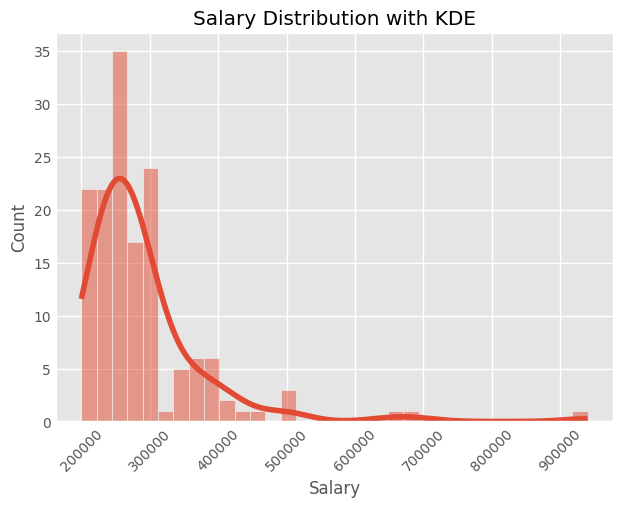

In [498]:
# Plot the histogram with KDE
#plt.figure(figsize=(10, 6))
sns.histplot(df['salary'], kde=True)
plt.title('Salary Distribution with KDE')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Axes: >

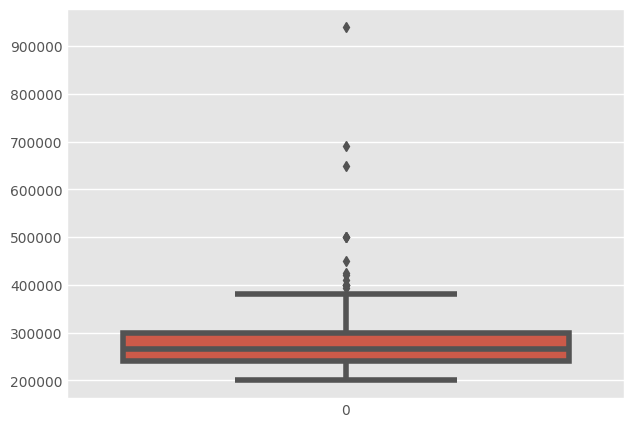

In [499]:
# Plotted the box plot of salary
sns.boxplot(df['salary'])

<Axes: xlabel='hsc_s', ylabel='salary'>

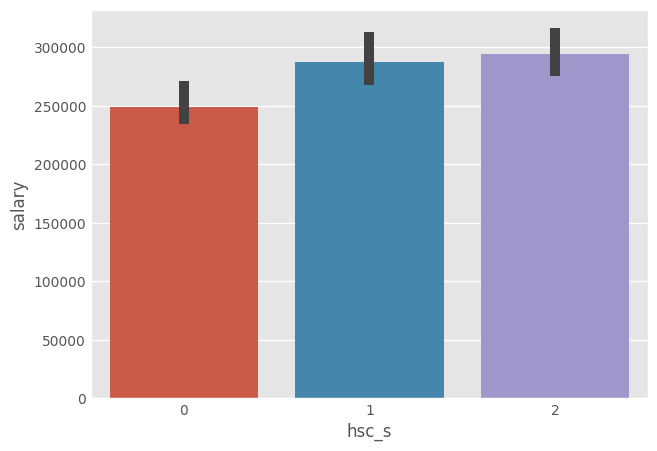

In [500]:
# barplot with hsc_s on x and salary on y
sns.barplot(x='hsc_s',y='salary',data=df)

From the above plot, it is clear that the avg salary for Arts student is something around 250000 and for commerce and science students its around 300000 with science students having higher salary than commerce students.

<Axes: xlabel='status', ylabel='specialisation'>

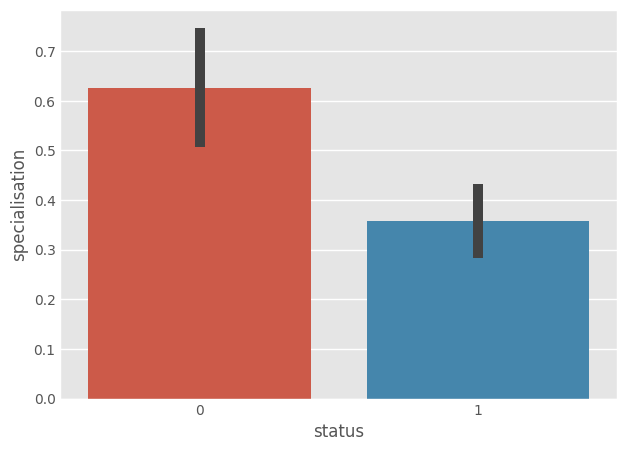

In [501]:
sns.barplot(x='status',y='specialisation',data=df)

<Axes: xlabel='workex', ylabel='salary'>

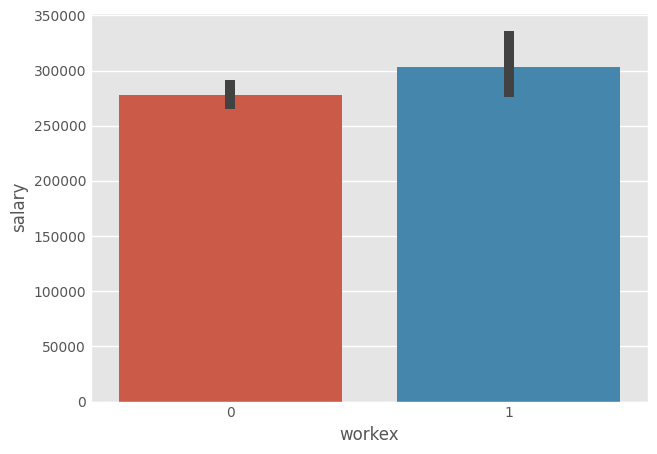

In [502]:
sns.barplot(x='workex',y='salary',data=df)

From the above plot, it is clear that the students with work experience get higher salary than those who don't have work experience.

<Axes: xlabel='status', ylabel='degree_p'>

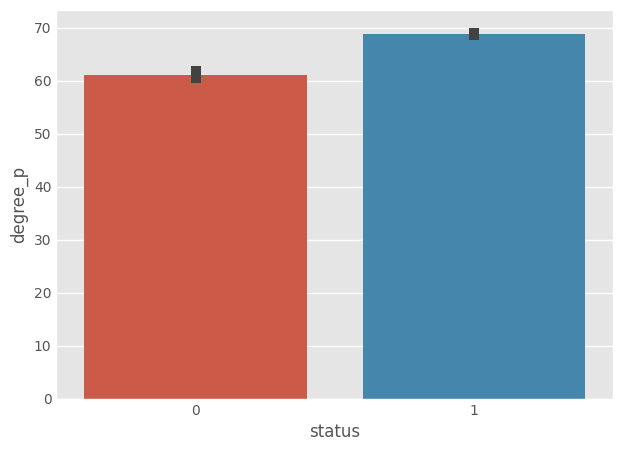

In [503]:
sns.barplot(x='status',y='degree_p',data=df)

From the above plot, it is clear that the number of students with higher percentage/marks get more placed than those with lower percentages.

/opt/conda/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning:

Mean of empty slice

/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning:

All-NaN slice encountered



<Axes: xlabel='status', ylabel='salary'>

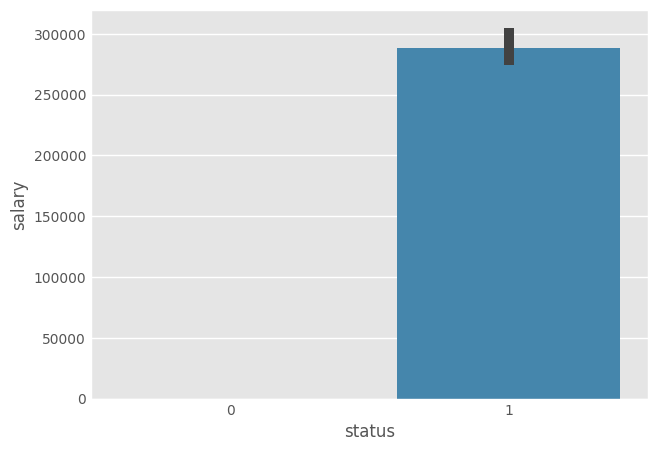

In [504]:
sns.barplot(x='status',y='salary',data=df)

The barchart we are seeing like this is because status 0 students didn't get placed.

#### Now Let's have a look on some piecharts

In [505]:
gender_counts = df['status'].groupby(df['gender']).value_counts()
gender_counts

gender  status
0       1          48
        0          28
1       1         100
        0          39
Name: count, dtype: int64

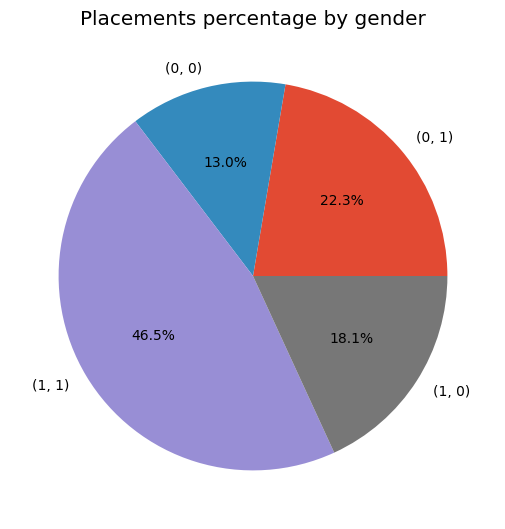

In [506]:
# Pie chart for gender percentage among placed and notPlaced students.
#(0,1) => (female, Placed), (0,0) => (Female, notPlaced) and so on.
plt.figure(figsize=(8, 6)) 
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Placements percentage by gender')
plt.show()

We can see that the percentage of female candidates who get placed is 22.3% and female candidates who didn't get placed is 13.0%, male candidates who get placed is 46.5% and male candidates who didn't get placed is 18.1%.

In [507]:
counts = df['status'].groupby(df['workex']).value_counts()
counts

workex  status
0       1         84
        0         57
1       1         64
        0         10
Name: count, dtype: int64

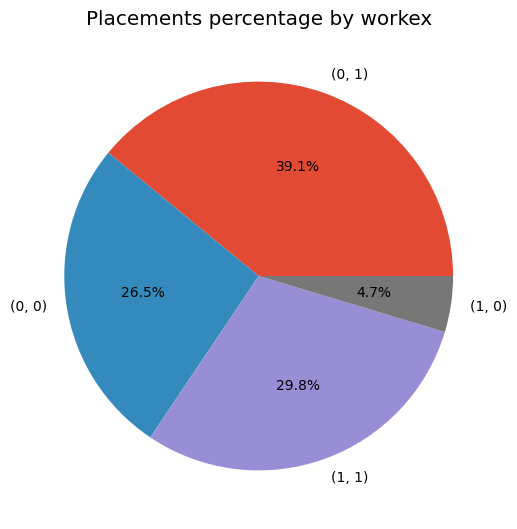

In [508]:
# Pie chart for workex percentage among placed students
plt.figure(figsize=(8, 6)) 
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Placements percentage by workex')
plt.show()

We can see that the percentage of candidates with zero work experience who get placed is 39.1% and with work experience who get placed is 29.8%, with zero work experience who didn't get placed is 26.5% and with work experience who didn't get placed is 4.1%.

Text(0, 0.5, 'Degree percentage')

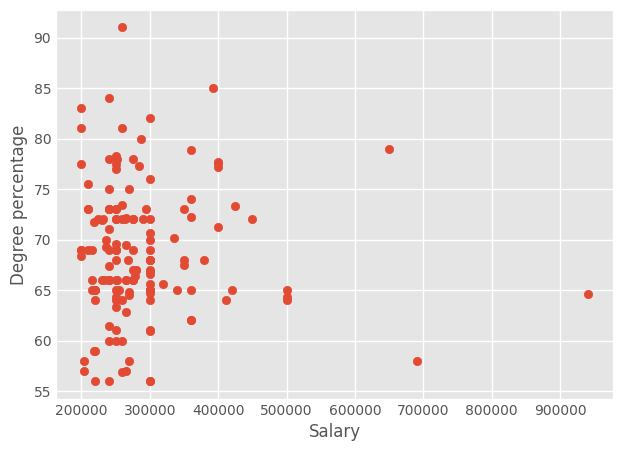

In [509]:
plt.scatter(x='salary',y='degree_p',data=df)
plt.xlabel('Salary')
plt.ylabel('Degree percentage')

Text(0, 0.5, 'MBA percentage')

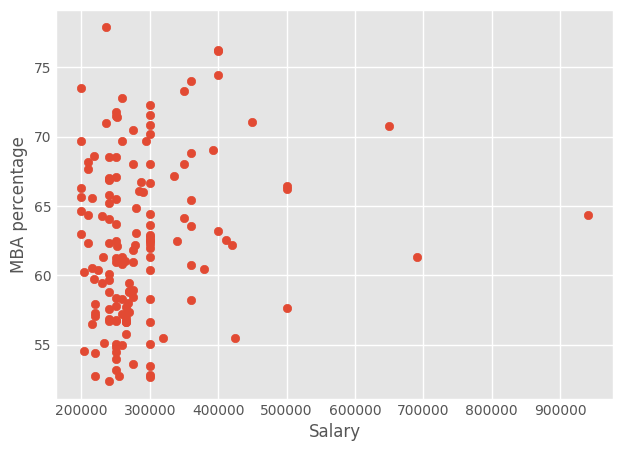

In [510]:
plt.scatter(x='salary',y='mba_p',data=df)
plt.xlabel('Salary')
plt.ylabel('MBA percentage')

In [511]:
# here we are droping salary column as we want to predict whether the student get placed or not so there is no use of salary. 
df.drop(columns=['salary'], inplace=True) 

In [512]:
df.head(20)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,1,67.00,0,91.00,0,1,58.00,1,0,55.00,1,58.80,1
1,2,1,79.33,1,78.33,0,2,77.48,1,1,86.50,0,66.28,1
2,3,1,65.00,1,68.00,1,0,64.00,2,0,75.00,0,57.80,1
3,4,1,56.00,1,52.00,1,2,52.00,1,0,66.00,1,59.43,0
4,5,1,85.80,1,73.60,1,1,73.30,2,0,96.80,0,55.50,1
5,6,1,55.00,0,49.80,0,2,67.25,1,1,55.00,0,51.58,0
6,7,0,46.00,0,49.20,0,1,79.00,2,0,74.28,0,53.29,0
7,8,1,82.00,1,64.00,1,2,66.00,1,1,67.00,0,62.14,1
8,9,1,73.00,1,79.00,1,1,72.00,2,0,91.34,0,61.29,1
9,10,1,58.00,1,70.00,1,1,61.00,2,0,54.00,0,52.21,0


In [513]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

Here i am considering "status" as y(means output value)

In [515]:
# Dropping the 'Status' column
X = df.drop(columns=['status'])

# 'y' as the 'status' column
y = df['status']

In [516]:
# Let's split our dataset into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

Let's train model, finallyyyy

In [517]:
# Initializing and fitting the logistic regression model
model = LogisticRegression(max_iter=2000)  # Increase max_iter if needed
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [518]:
# Predictions on the test set
y_pred = model.predict(X_test)

In [519]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8923076923076924


In [520]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.93      0.91      0.92        45

    accuracy                           0.89        65
   macro avg       0.87      0.88      0.88        65
weighted avg       0.89      0.89      0.89        65



In [521]:
# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[17  3]
 [ 4 41]]


In [522]:
#pd.set_option('display.max_rows', None)
y_pred==y_test

151     True
66      True
117     True
96      True
109     True
93      True
74     False
55      True
185     True
161     True
154     True
31      True
188     True
121    False
160     True
133     True
155    False
147     True
91      True
88      True
119     True
65      True
211     True
48      True
41     False
181     True
50      True
34      True
175    False
69      True
33      True
139     True
114     True
37      True
25      True
169     True
54      True
2       True
12      True
144     True
177     True
22     False
166     True
39      True
118     True
32      True
42      True
150     True
80      True
170     True
129     True
16      True
125     True
178    False
156     True
200     True
187     True
51      True
18      True
145     True
61      True
4       True
15      True
1       True
43      True
Name: status, dtype: bool

Our accuracy is 89.2% with logistic regression which is good but we can get better ig, so let's try to train other models too. 

In [531]:
from sklearn.ensemble import RandomForestClassifier
value=[]
i_val=[]
for i in range(1,200,1):
    rf=RandomForestClassifier(n_estimators=i)
    rf.fit(X_train,y_train)
    y_pred1=rf.predict(X_test)
    value.append(accuracy_score(y_test,y_pred1))
    i_val.append(i)

In [532]:
df1 = pd.DataFrame(value,index=i_val,columns=['Values'])
df1.tail(5)

,Values
195,0.892308
196,0.907692
197,0.892308
198,0.876923
199,0.907692


In [533]:
df1.max()

Values    0.923077
dtype: float64

In [534]:
print(classification_report(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.91      0.96      0.93        45

    accuracy                           0.91        65
   macro avg       0.90      0.88      0.89        65
weighted avg       0.91      0.91      0.91        65

0.9076923076923077


Here we got 90.7% accuracy with Random Forest Classifier

In [535]:
pd.set_option('display.max_rows', None)
print(y_test==y_pred1)

151     True
66      True
117     True
96      True
109    False
93      True
74     False
55      True
185     True
161     True
154    False
31      True
188     True
121     True
160     True
133     True
155     True
147     True
91      True
88      True
119     True
65      True
211     True
48      True
41     False
181    False
50      True
34      True
175    False
69      True
33      True
139     True
114     True
37      True
25      True
169     True
54      True
2       True
12      True
144     True
177     True
22      True
166     True
39      True
118     True
32      True
42      True
150     True
80      True
170     True
129     True
16      True
125     True
178     True
156     True
200     True
187     True
51      True
18      True
145     True
61      True
4       True
15      True
1       True
43      True
Name: status, dtype: bool


### Thank you so much for coming to the end of this notebook.😊